In [1]:
#행렬처리 모듈
import numpy as np
#자료구조인 Series, DataFrame 등을 제공하는 모듈
import pandas as pd
#추세 그래프 및 통계용 차트를 제공하는 시각화 모듈
import seaborn as sns
#그래프 및 시각화 모듈
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from sklearn import linear_model
from sklearn.preprocessing import scale, robust_scale, minmax_scale
#다중공선성 패키지 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor
#sklearn 선형회귀 모형 -> 변수 선택법을 위함
from sklearn.linear_model import LinearRegression
#변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
#평가 함수
from sklearn import metrics
#os: 환겨설정 패키지
import os 
#주성분 분석
from sklearn.decomposition import PCA
#상관계수 계산
from scipy import stats
#데이터 표준화 함수
from sklearn.preprocessing import StandardScaler

In [4]:
ds_supervisor = pd.read_csv("../../실습화일/체질검사.csv", engine="python")
#데이터 분할 : Y와 Xs 분리
ds_supervisor_x = ds_supervisor.drop("FAT", axis = 1)
ds_supervisor_y = ds_supervisor["FAT"]
ds_supervisor_x.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [5]:
#상관계수
ds_supervisor_x.corr()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
AGE,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
WEIGHT,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
HEIGHT,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
NECK,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
CHEST,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
ABDOMEN,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
HIP,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
THIGH,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685
KNEE,0.017516,0.853167,0.286053,0.672405,0.719496,0.737179,0.823473,0.799170,1.000000,0.611608,0.678709,0.555898,0.664507
ANKLE,-0.105058,0.613685,0.264744,0.477892,0.482988,0.453223,0.558387,0.539797,0.611608,1.000000,0.484855,0.419050,0.566195


In [ ]:
#산점도 행렬
temp = ds_supervisor_x
temp["FAT"] = ds_supervisor_y
sns.pairplot(temp, hue="FAT")

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/home/pirl/anaconda3/e

In [ ]:
ds_supervisor_x = ds_supervisor.drop("FAT", axis = 1)

In [ ]:
ds_supervisor_x.shape

In [8]:
#데이터 표준화
scaler = StandardScaler()
#데이터 표준화 변환
ds_supervisor_x_scaled = scaler.fit_transform(ds_supervisor_x)
#표준화된 데이터 확인
print("Scaled Data :\n {}".format(ds_supervisor_x_scaled[:30].round(3)))
#데이터 형태 확인
print("Shape :\n {}".format(ds_supervisor_x_scaled.shape))

Scaled Data :
 [[ 1.097e+00 -2.073e+00  1.270e+00  9.840e-01  1.568e+00  3.284e+00
   2.653e+00  2.532e+00  2.218e+00  2.256e+00  2.490e+00 -5.650e-01
   2.833e+00  2.488e+00 -2.140e-01  1.317e+00  7.240e-01  6.610e-01
   1.149e+00  9.070e-01  1.887e+00 -1.359e+00  2.304e+00  2.001e+00
   1.308e+00  2.617e+00  2.110e+00  2.296e+00  2.751e+00  1.937e+00]
 [ 1.830e+00 -3.540e-01  1.686e+00  1.909e+00 -8.270e-01 -4.870e-01
  -2.400e-02  5.480e-01  1.000e-03 -8.690e-01  4.990e-01 -8.760e-01
   2.630e-01  7.420e-01 -6.050e-01 -6.930e-01 -4.410e-01  2.600e-01
  -8.050e-01 -9.900e-02  1.806e+00 -3.690e-01  1.535e+00  1.890e+00
  -3.760e-01 -4.300e-01 -1.470e-01  1.087e+00 -2.440e-01  2.810e-01]
 [ 1.580e+00  4.560e-01  1.567e+00  1.559e+00  9.420e-01  1.053e+00
   1.363e+00  2.037e+00  9.400e-01 -3.980e-01  1.229e+00 -7.800e-01
   8.510e-01  1.181e+00 -2.970e-01  8.150e-01  2.130e-01  1.425e+00
   2.370e-01  2.940e-01  1.512e+00 -2.400e-02  1.347e+00  1.456e+00
   5.270e-01  1.083e+00  8.550e

In [9]:
#주성분 분석 모델 생성. Prin 1~30까지
pca = PCA(n_components = 10)
#Prin 1~6까지의 새로운 변수 값을 생성
x_pca = pca.fit_transform(ds_supervisor_x_scaled)
# 계산된 Prin 1~6 주성분 변수의 5번째 값까지 확인
print("PCA Data :\n {}".format(x_pca[:28]))
#Shape : Prin 1~6까지의 Row개수, Column개수 확인
print("Shape :\n {}".format(x_pca.shape))
#주성분 점수 저장. Prin 1~6까지
ds_x_pca = pd.DataFrame(x_pca, columns = ["Prin1", "Prin2", "Prin3","Prin4","Prin5","Prin6","Prin7","Prin8","Prin9","Prin10","Prin11","Prin12","Prin13","Prin14","Prin15","Prin16","Prin17","Prin18","Prin19","Prin20","Prin21","Prin22","Prin23","Prin24","Prin25","Prin26","Prin27","Prin28","Prin29","Prin30"])




PCA Data :
 [[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00  3.63373090e+00
  -1.19511012e+00  1.41142445e+00  2.15936987e+00 -3.98407230e-01
  -1.57118359e-01 -8.77401880e-01  2.62955455e-01 -8.59014477e-01
   1.03387665e-01 -6.90804097e-01 -6.01793127e-01  7.45115792e-01
  -2.65470777e-01 -5.49562693e-01 -1.33767500e-01  3.45564905e-01
   9.65148929e-02  6.88499220e-02  8.45185932e-02 -1.75256284e-01
  -1.51020059e-01 -2.01503451e-01 -2.52584993e-01 -3.39144536e-02
   4.56477199e-02 -4.71692081e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01  1.11826386e+00
   6.21774980e-01  2.86563545e-02  1.33580935e-02  2.40988459e-01
  -7.11904816e-01  1.10699494e+00  8.13119658e-01  1.57922585e-01
  -9.43529283e-01 -6.53475327e-01  8.97486713e-03 -6.48808694e-01
  -1.72122035e-02  3.18297381e-01  2.47564629e-01 -1.14133080e-01
  -7.73274741e-02 -9.45784509e-02 -2.17718064e-01  1.12901180e-02
  -1.70510254e-01 -4.11287846e-02  1.81270166e-01  3.26241827e-02
  -5.68742432e-03 -1.86787626

In [11]:
#주성분 통계량 입력용 새로운 데이터 프레임 생성
ds_pca = pd.DataFrame()
#주성분 분석 모델의 주성부 번호, Eigenvalue, Eigenvalue ratio 등을 데이터 프레임의 형태로 저장
ds_pca["Prin"] = [I for I in range(1,31)]
ds_pca["EigenValues"] = pca.explained_variance_##Eigen values
ds_pca["EigenValueRatio"] = pca.explained_variance_ratio_ ##Eigen values ratio
ds_pca["CumsumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
ds_pca.round(3)

,Prin,EigenValues,EigenValueRatio,CumsumEigenValueRatio
0,1,13.305,0.443,0.443
1,2,5.701,0.190,0.632
2,3,2.823,0.094,0.726
3,4,1.984,0.066,0.792
4,5,1.652,0.055,0.847
5,6,1.209,0.040,0.888
6,7,0.676,0.023,0.910
7,8,0.477,0.016,0.926
8,9,0.418,0.014,0.940
9,10,0.351,0.012,0.952


### ds_pca는 30개의 컴포넌트에 주성분 번호, Eigenvalue, Eigenvalue ratio를 저장한 데이터프레임이다.
### Eigenvalue는 값이 클수록 전체 주성분에서 큰 비율을 차지한다. 즉, Eigenvalue값이 크다는 것은
### 전체 데이터를 그만큼 많이 설명할 수 있다는 뜻이다.


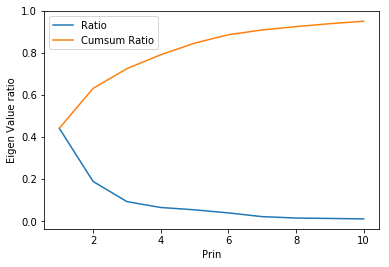

In [22]:
#고유값 비율 그래프 생성
plt.plot(ds_pca["Prin"], ds_pca["EigenValueRatio"], label = "Ratio")
#누적된 고유값 비율 그래프 생성
plt.plot(ds_pca["Prin"], ds_pca["CumsumEigenValueRatio"], label = "Cumsum Ratio")
#그래프 label, legend 설정
plt.ylabel("Eigen Value ratio")
plt.xlabel("Prin")
plt.legend(loc = "best")

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10
Prin1,1.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
Prin2,0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0
Prin3,-0.0,-0.0,1.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0
Prin4,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
Prin5,-0.0,0.0,0.0,-0.0,1.0,0.0,0.0,-0.0,-0.0,-0.0
Prin6,-0.0,0.0,0.0,0.0,0.0,1.0,-0.0,0.0,0.0,0.0
Prin7,-0.0,-0.0,0.0,-0.0,0.0,-0.0,1.0,-0.0,-0.0,0.0
Prin8,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,1.0,0.0,0.0
Prin9,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,1.0,0.0
Prin10,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,1.0


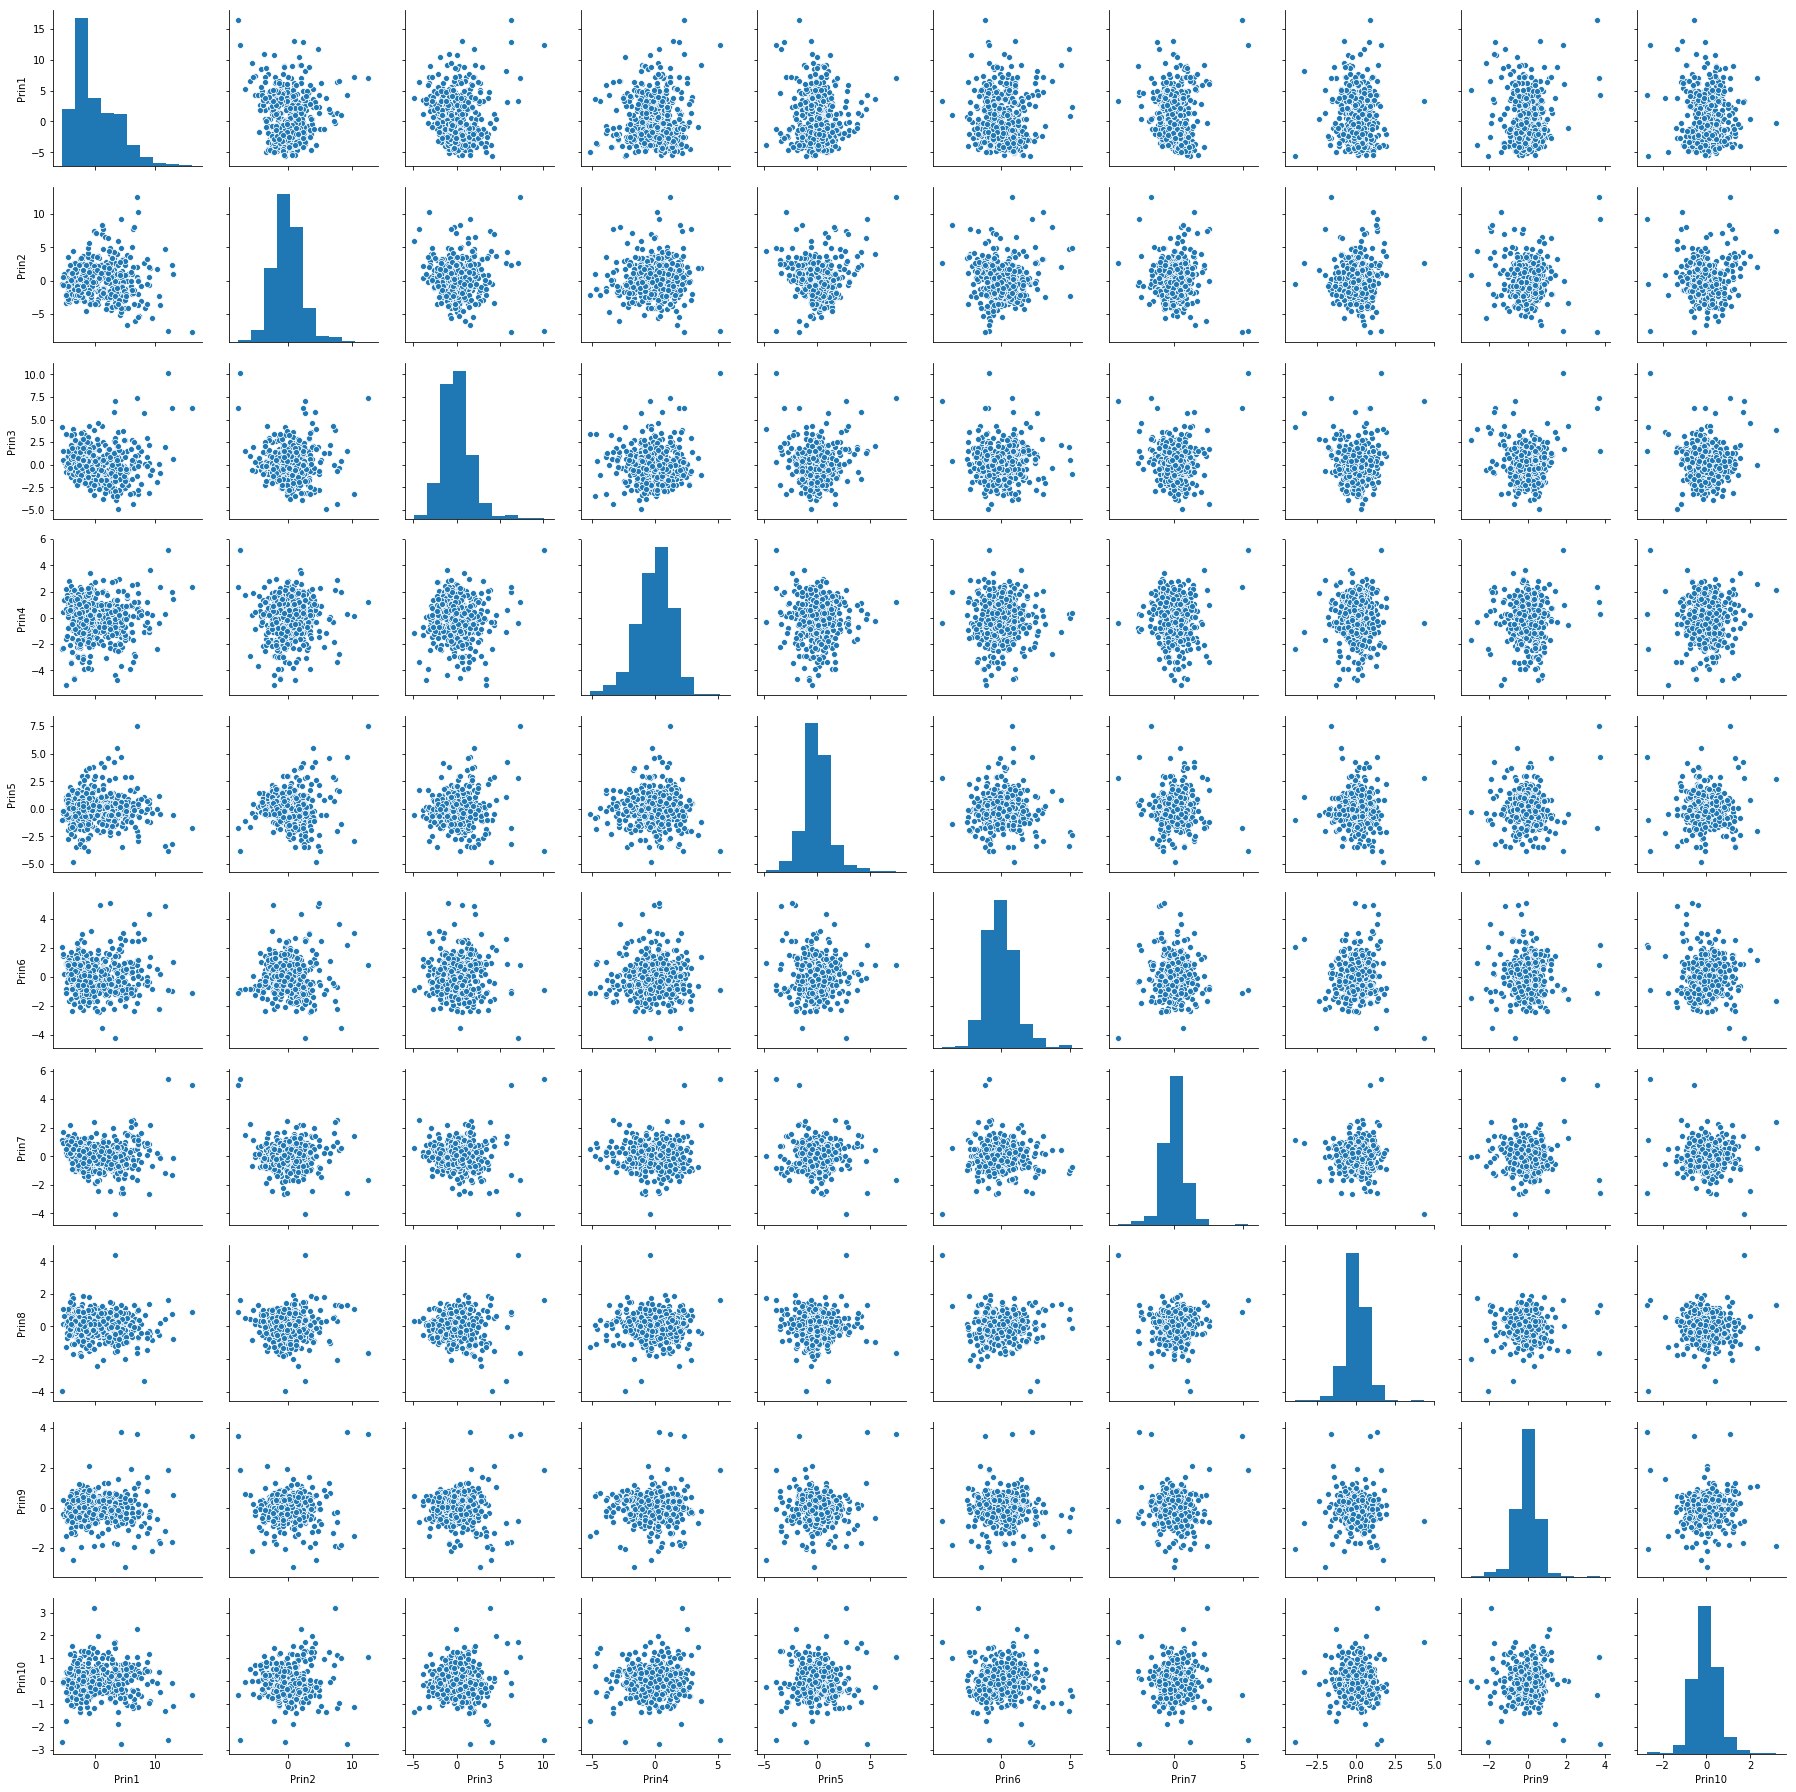

In [23]:
#산점도 행렬
sns.pairplot(ds_x_pca)


#상관계수
ds_x_pca.corr().round(3)

In [24]:
#회귀분석 패키지 불러오기
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# Scree plot을 이용하여 선택한 주성분
x_var = ["Prin1", "Prin2","Prin3","Prin4","Prin5","Prin6","Prin7","Prin8","Prin9","Prin10"]
#기존 주성분 데이터에 절편(Intercept) 컬럼 추가
ds_x_pca_const = sm.add_constant(ds_x_pca[x_var])
#train, test 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(ds_x_pca_const, ds_supervisor_y, test_size = 0.3, random_state = 2222)
#train 데이터로 회귀분석 모델 생성
reg_model = sm.OLS(y_train, X_train)
#fit : 회귀모형의 fit line 생성
reg_model = reg_model.fit()
#Summary(): 회귀분석 통계량 결과 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     105.9
Date:                Fri, 15 Feb 2019   Prob (F-statistic):          2.83e-104
Time:                        09:30:33   Log-Likelihood:                -14.561
No. Observations:                 398   AIC:                             51.12
Df Residuals:                     387   BIC:                             94.97
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6320      0.013     49.342      0.0